In [1]:
!git clone https://github.com/phizaz/diffae.git
%cd diffae

Cloning into 'diffae'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 490 (delta 88), reused 81 (delta 78), pack-reused 374
Receiving objects: 100% (490/490), 11.23 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (279/279), done.
/content/diffae


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install --upgrade pip
!pip install torch torchvision torchaudio  pytorch-lightning  torchtext -f https://download.pytorch.org/whl/torch_stable.html
!pip install scipy
!pip install numpy
!pip install tqdm
!pip install pytorch-fid
!pip install pandas
!pip install lpips
!pip install lmdb
!pip install ftfy
!pip install regex
!pip install dlib requests

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
from templates import *

In [ ]:
import os.path as osp
model_resolution = 256
device = 'cuda:0'
model_config = ffhq256_autoenc()

download_paths = {
    256: {
        'diffae_weight': 'https://vistec-my.sharepoint.com/:u:/g/personal/nattanatc_pro_vistec_ac_th/ER56kn-uzlNAi39E1c784qQBkj5RI7-OAZC9QghQsIDQiQ?download=1' ,
        'diffae_latent':  'https://vistec-my.sharepoint.com/:u:/g/personal/nattanatc_pro_vistec_ac_th/EcZqHAWy2v9GuaXuESDg1tUB4li-hf0aC-2SjeLxB3ASdQ?download=1' ,
        'cls_weight': 'https://vistec-my.sharepoint.com/:u:/g/personal/nattanatc_pro_vistec_ac_th/ESzwEubKDNBEmYcbEr9O2jABtNqk_p7f2xYQ_t3PurXnHg?download=1'
    },
    128: {
        'diffae_weight': 'https://vistec-my.sharepoint.com/:u:/g/personal/nattanatc_pro_vistec_ac_th/Eb36o-4NlSFGmpj3Vut2p-gBswf8PsUmeiqIEbA8XmAqWA?download=1',
        'diffae_latent': 'https://vistec-my.sharepoint.com/:u:/g/personal/nattanatc_pro_vistec_ac_th/EQ9jjIjJRcJCs6h3d_LnJYoBvKk7zEMlHZn5btEKBEYoXg?download=1',
        'cls_weight': 'https://vistec-my.sharepoint.com/:u:/g/personal/nattanatc_pro_vistec_ac_th/Eb36o-4NlSFGmpj3Vut2p-gBswf8PsUmeiqIEbA8XmAqWA?download=1'
    }
}

weight_dir_path = f'checkpoints/{model_config.name}'
if not osp.exists(weight_dir_path): os.makedirs(weight_dir_path)
model_download_path = download_paths[model_resolution]['diffae_weight']
latents_download_path = download_paths[model_resolution]['diffae_latent']
!wget -O '{weight_dir_path}/last.ckpt' '{model_download_path}'
!wget -O '{weight_dir_path}/latent.pkl' '{latents_download_path}'


--2024-06-27 14:45:53--  https://vistec-my.sharepoint.com/:u:/g/personal/nattanatc_pro_vistec_ac_th/ER56kn-uzlNAi39E1c784qQBkj5RI7-OAZC9QghQsIDQiQ?download=1
Resolving vistec-my.sharepoint.com (vistec-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to vistec-my.sharepoint.com (vistec-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/nattanatc_pro_vistec_ac_th/Documents/diffae-public/checkpoints/ffhq256_autoenc/last.ckpt?ga=1 [following]
--2024-06-27 14:45:54--  https://vistec-my.sharepoint.com/personal/nattanatc_pro_vistec_ac_th/Documents/diffae-public/checkpoints/ffhq256_autoenc/last.ckpt?ga=1
Reusing existing connection to vistec-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 2722085968 (2.5G) [application/octet-stream]
Saving to: ‘checkpoints/ffhq256_autoenc/last.ckpt’

checkpoints/ffhq256 100%[===================>]   2.53G  69.5MB/s    in 38s  

In [ ]:
device = 'cuda:0'
conf = ffhq256_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

INFO:lightning_fabric.utilities.seed:Seed set to 0


Model params: 160.69 M


Saving Face.jpg to Face.jpg


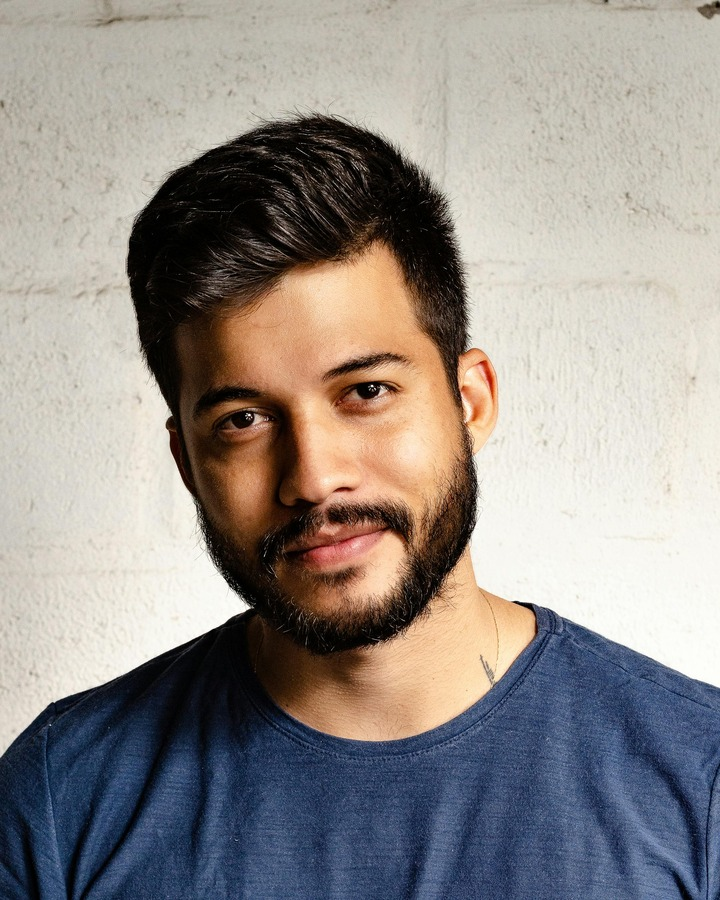

move file Face.jpg to imgs 


In [ ]:
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
import shutil


uploaded_imgs_path = 'imgs'
if not osp.exists(uploaded_imgs_path) : os.makedirs(uploaded_imgs_path)

def upload_img():
  uploaded_img = files.upload()
  uploadded_img_name = list(uploaded_img.keys())[0]

  img = cv2.imread(uploadded_img_name)
  cv2_imshow(img)

  # shutil.move(uploadded_img_name, uploaded_imgs_path)
  !mv "{uploadded_img_name}" "{uploaded_imgs_path}"

  print(f"move file {uploadded_img_name} to {uploaded_imgs_path} ")
# print(uploaded_img.keys())
# for fn in uploaded_img.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded_img[fn])))

upload_img()

In [ ]:
!python align.py

cached
cached
total img files 2
  0% 0/2 [00:00<?, ?it/s]/content/diffae/align.py:117: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((output_size, output_size), PIL.Image.ANTIALIAS)
100% 2/2 [00:03<00:00,  1.82s/it]
output aligned images at: imgs_align


In [ ]:
data = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch = data[1]['img'][None]

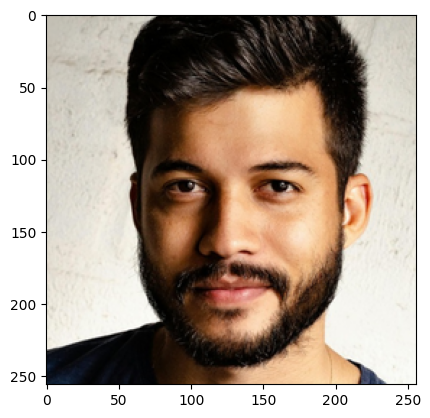

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(batch[0].permute([1, 2, 0]) / 2 + 0.5)

# Encode

In [ ]:
cond = model.encode(batch.to(device))
xT = model.encode_stochastic(batch.to(device), cond, T=250)

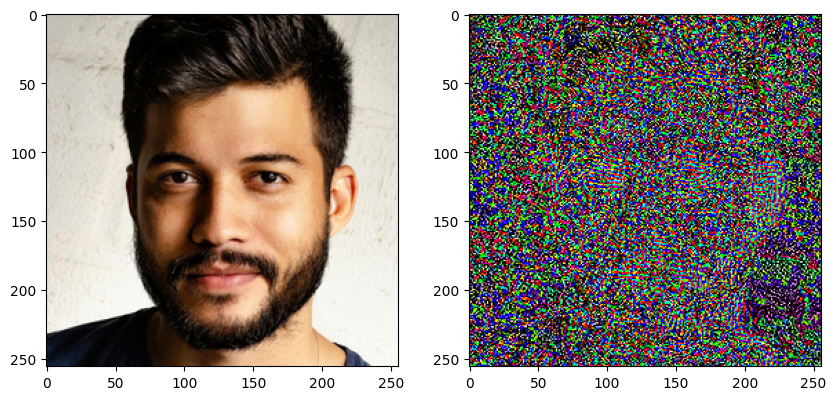

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())

# Decode

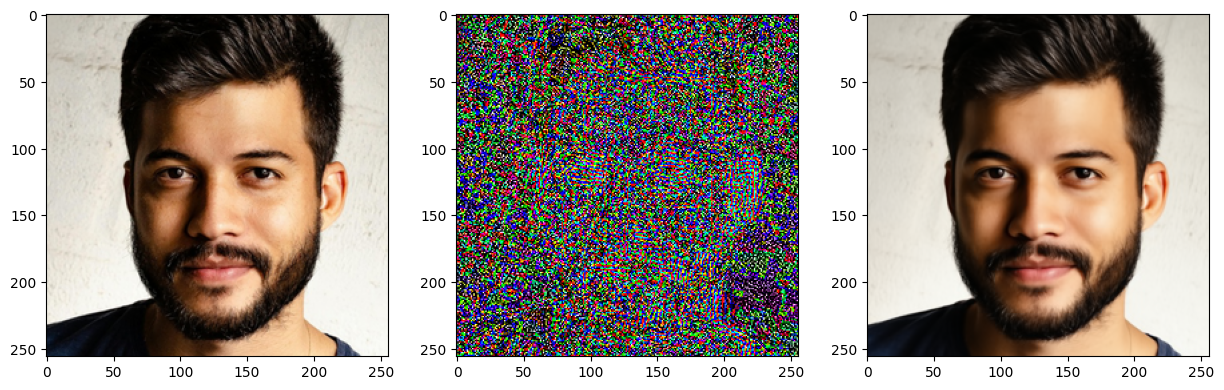

In [ ]:
pred = model.render(xT, cond, T=20)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())
ax[2].imshow(pred[0].permute(1, 2, 0).cpu())